In [ ]:
import warnings
import pandas as pd
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 1000)
pd.set_option('display.max_rows', 1000)

In [ ]:
%matplotlib inline

from pathlib import Path
import numpy as np
import pandas as pd
import pandas_datareader.data as web
import gc
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS
from sklearn.preprocessing import scale
import talib
import matplotlib.pyplot as plt
import seaborn as sns

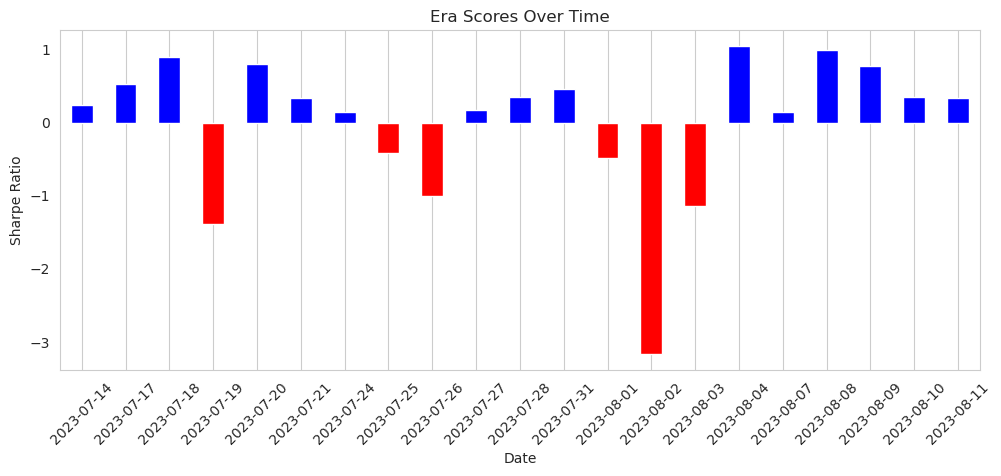

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_sharpe_ratio(path):
    """Plot Sharpe Ratio against Date from a given CSV file."""
    
    # Read the CSV file
    data = pd.read_csv(path, skiprows=1)
    
    # Split the single column into date and sharpe_ratio columns
    first_column_name = data.columns[0]  # get the name of the first column
    data['date'] = data[first_column_name].str.split().str[0]
    data['sharpe_ratio'] = data[first_column_name].str.split().str[1].astype(float)
    
    # Drop the original merged column
    data.drop(first_column_name, axis=1, inplace=True)
    
    # Set date as the index
    data.set_index('date', inplace=True)
    
    # Determine colors
    colors = ['blue' if val >= 0 else 'red' for val in data['sharpe_ratio']]
    
    # Plot
    plt.figure(figsize=(10, 5))
    data['sharpe_ratio'].plot(kind='bar', color=colors)
    plt.xlabel('Date')
    plt.ylabel('Sharpe Ratio')
    plt.title("Era Scores Over Time")
    plt.grid(axis='y')  # Show grid lines only on y-axis
    plt.tight_layout()
    plt.xticks(rotation=45)
    plt.show()

# Test the function
path = "/home/sayem/Desktop/Project/era_scores/YEAR_20130102_20141208_temp_era_scores.csv"
plot_sharpe_ratio(path)

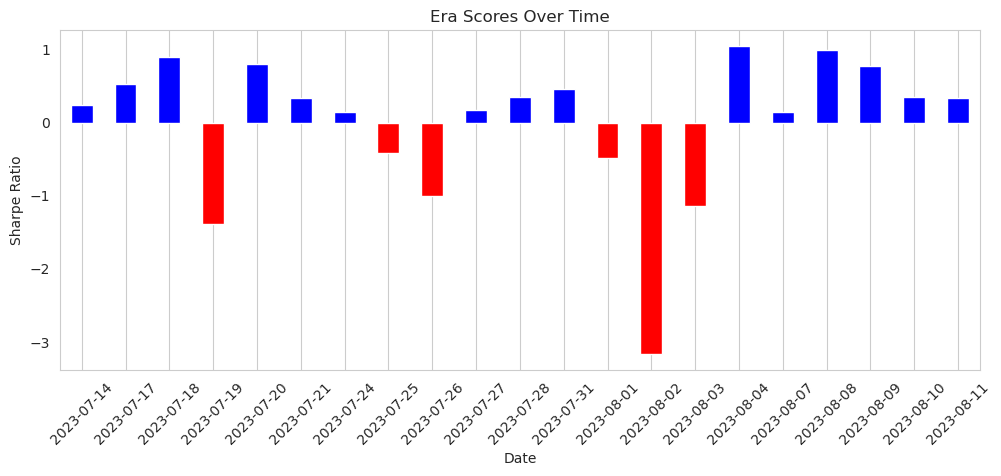

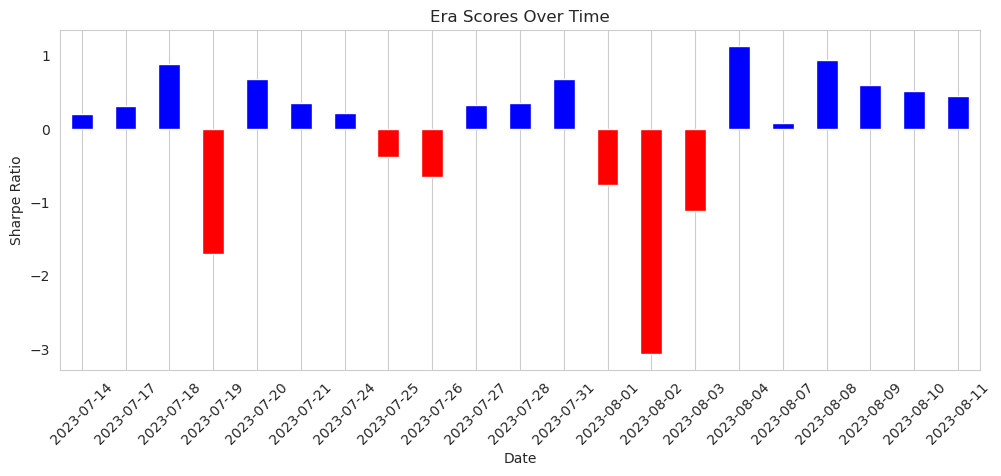

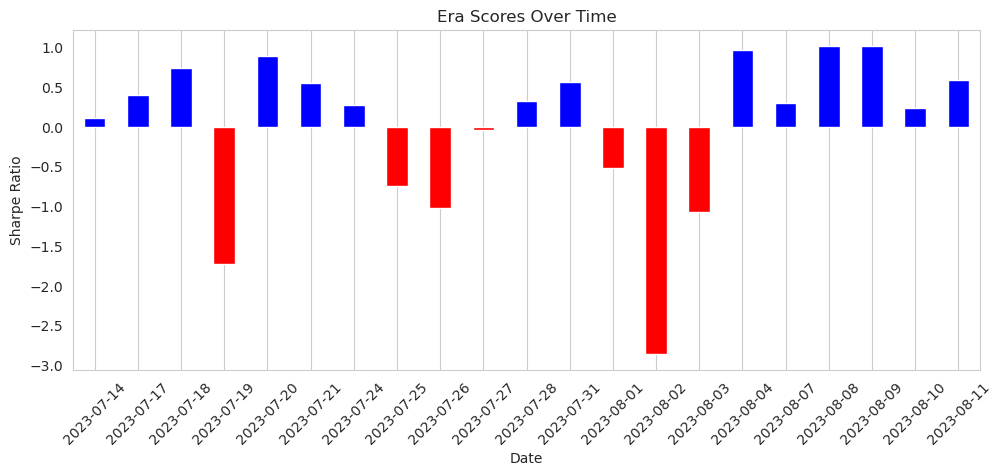

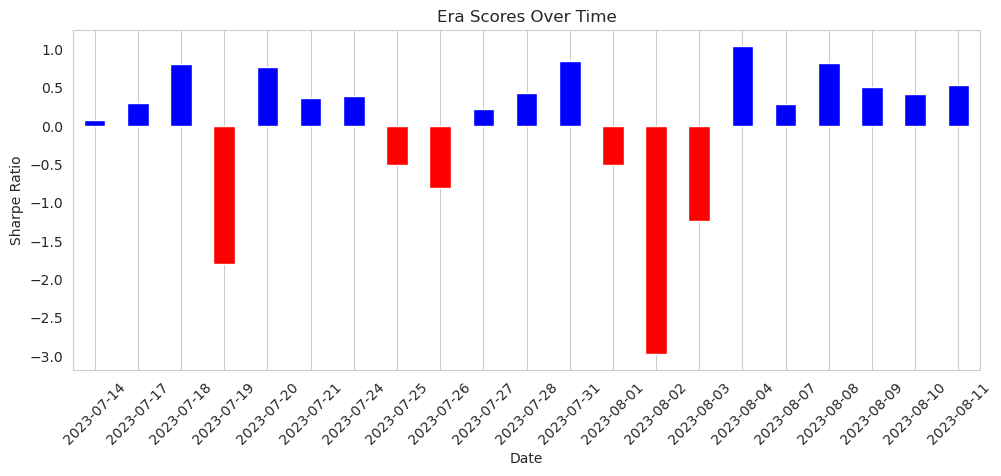

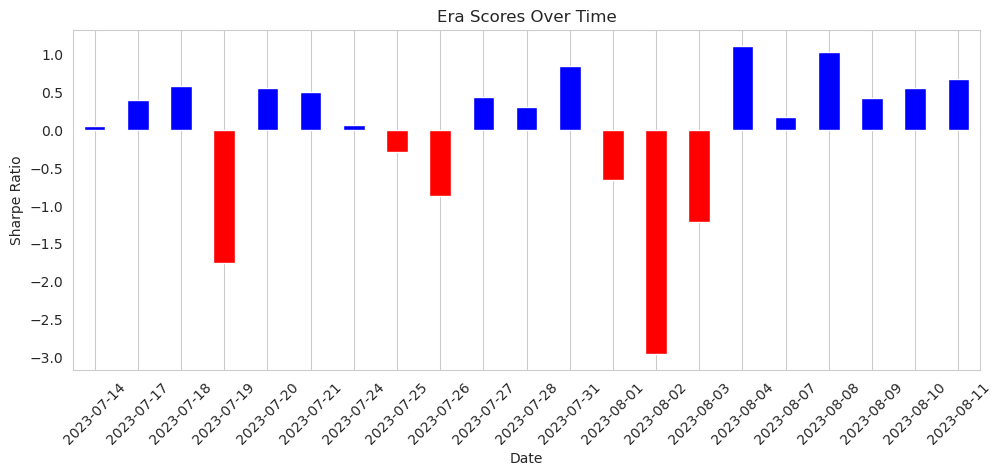

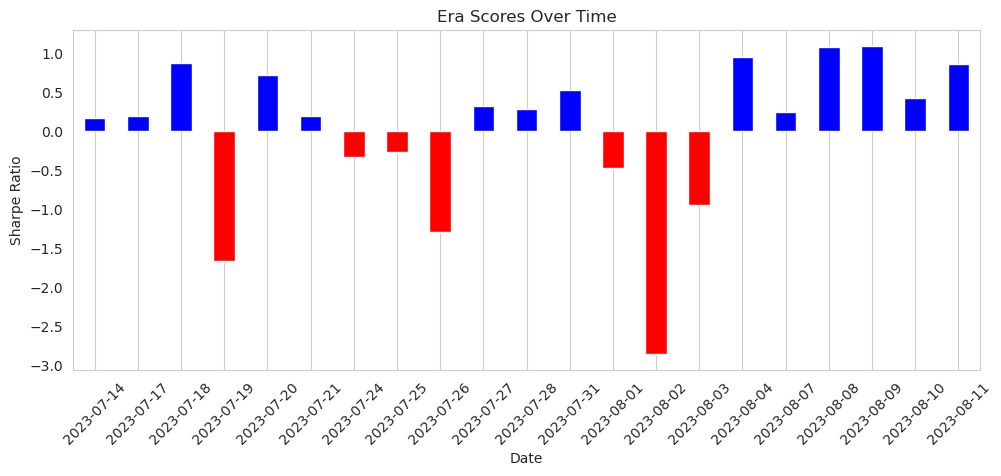

In [137]:
import os

def plot_all_files_in_directory(directory_path):
    """Iterate over all .csv files in the directory and plot Sharpe Ratio for each."""
    # List all files in the directory
    all_files = os.listdir(directory_path)

    # Filter only .csv files
    csv_files = [f for f in all_files if f.endswith('.csv')]

    # Iterate over each .csv file and plot the Sharpe Ratio
    for csv_file in csv_files:
        file_path = os.path.join(directory_path, csv_file)
        plot_sharpe_ratio(file_path)

# Specify the directory path
directory_path = "/home/sayem/Desktop/Project/era_scores"
plot_all_files_in_directory(directory_path)
